In [48]:
sys.path.append('..')
from utils.planar_utils import load_planar_dataset
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib
import random

np.random.seed(42)


# TRAIN A 1-HIDDEN-LAYER NEURAL NETWORK

## helper functions

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## load data

In [50]:
## CATVSNONCAT DATASET ##
###########################
def load_data():
    """
    Load the train and test set.

    Returns:
        - (X_train, Y_train, X_test, Y_test)
    """

    path = Path('../../data/catvnoncat/data.pkl')
    with open(path, "rb") as f:
        data = joblib.load(f)

    X_train = data["train_set_x"]
    Y_train = data["train_set_y"]
    X_test = data["test_set_x"]
    Y_test = data["test_set_y"]

    return X_train, Y_train, X_test, Y_test
############################
############################

In [51]:
# ## FLOWER DATASET ## 
# ####################

# def load_data():
#     """
#     Load the train and test set.

#     Returns:
#         - (X_train, Y_train, X_test, Y_test)
#     """

#     X, Y = load_planar_dataset()

#     ## train / test split
#     m = X.shape[1]
#     pct_test = 0.20
#     m_test = int(m * pct_test)
#     idx_test = np.random.choice(m, size=m_test, replace=False)
#     idx_train = [i for i in range(m) if i not in idx_test]
#     X_train = X[:, idx_train]
#     Y_train = Y[:, idx_train]
#     X_test = X[:, idx_test]
#     Y_test = Y[:, idx_test]

#     return X_train, Y_train, X_test, Y_test

# ####################
# ####################

In [52]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_data()

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"Y_train_orig shape: {Y_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"Y_test_orig shape: {Y_test_orig.shape}")

X_train_orig shape: (209, 64, 64, 3)
Y_train_orig shape: (209,)
X_test_orig shape: (50, 64, 64, 3)
Y_test_orig shape: (50,)


## visualize data

In [53]:
## CATVSNONCAT DATASET ##
#########################
def visualize_data(X, Y):
    """
    Displays a random image with its label
    """
    m = X.shape[0]
    i = random.randint(0, m-1)
    x = X[i]
    y = Y[i]
    labels = {0: "non-cat", 1: "cat"}
    print(f'label: {labels[y]}')
    plt.imshow(x)
####################
####################

In [54]:
# ## FLOWER DATASET ##
# ####################
# def visualize_data(X, Y):
#     """
#     Displays a random image with its label
#     """
#     plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.cividis)
# ####################
# ####################

label: non-cat


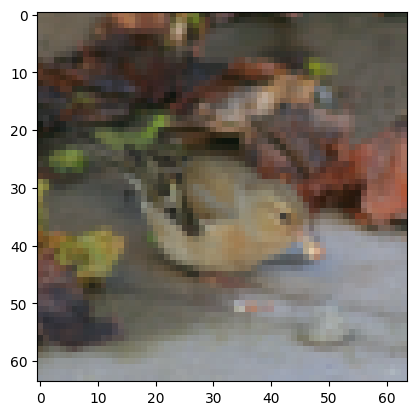

In [55]:
visualize_data(X_train_orig, Y_train_orig)

## preprocess data

In [56]:
## CATVSNONCAT DATASET ##
#########################
def preprocess_data(X, Y = None):
    """Preprocess input data, in order to be fed as the input of the neural network.
    
    Operations:
        - Reshaping of the arrays to fit the Neural Network Input
        - Normalization
    Returns:
        (X_pp, Y_pp)
        
        using the following notations:
        - n_x: number of features in the input of the neural network
        - m: number of observations 
        X_pp: normalized matrix of size (n_x, m)
        Y_pp: normalized array of size (1, m)
    """
    m = X.shape[0]

    ## reshaping
    X = X.reshape(m, -1).T
    if Y is not None:
        Y = Y.reshape(m, 1).T
    
    ## normalization
    X = X / 255.
    
    return X,Y
####################
####################

In [57]:
# ## FLOWER DATASET ## 
# ####################

# def preprocess_data(X, Y = None):
#     """Preprocess input data, in order to be fed as the input of the neural network.
#     """
#     # nothing to do, the data is already in the right shape and scale !
#     return X, Y

# ###################
# ###################

In [58]:
X_train, Y_train = preprocess_data(X_train_orig, Y_train_orig)
X_test, Y_test = preprocess_data(X_test_orig, Y_test_orig)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (12288, 209)
Y_train shape: (1, 209)
X_test shape: (12288, 50)
Y_test shape: (1, 50)


## define the network structure

We want to build a 1 hidden layer neural network:

![](../../schemas/1HL-NN.png)

In [59]:
def get_layer_sizes(X, nb_hidden_units = 5):
    """
    Returns:
        - n: list containing the number of hidden units per layer
    """
    n = list()
    n.append(X.shape[0]) 
    n.append(nb_hidden_units)
    n.append(1)
    return n

In [60]:
n = get_layer_sizes(X_train, nb_hidden_units = 3)
print(f"n_0: {n[0]}")
print(f"n_1: {n[1]}")
print(f"n_2: {n[2]}")

n_0: 12288
n_1: 3
n_2: 1


## initialize the parameters

In [61]:
def initialize_params(n: list[int]):

    params = dict()
    for i in range(1, len(n)):
        params[f"W{i}"] = np.random.randn(n[i], n[i-1]) * 0.01
        params[f"b{i}"] = np.zeros((n[i], 1))
    return params

In [62]:
params = initialize_params(n)

In [63]:
print(f"shape of W1: {params['W1'].shape}")
print(f"shape of b1: {params['b1'].shape}")
print(f"shape of W2: {params['W2'].shape}")
print(f"shape of b2: {params['b2'].shape}")

shape of W1: (3, 12288)
shape of b1: (3, 1)
shape of W2: (1, 3)
shape of b2: (1, 1)


In [64]:
params['W1']

array([[ 0.00496714, -0.00138264,  0.00647689, ...,  0.00606795,
         0.00245819, -0.0141764 ],
       [-0.00332273, -0.00612551, -0.00461745, ...,  0.00043588,
         0.0051953 , -0.00264349],
       [ 0.00516406, -0.00085402,  0.01011368, ...,  0.00386897,
        -0.00176678, -0.00342218]])

## forward propagate

In [65]:
def forward_propagate(params, X):

    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    return A2, cache

In [66]:
A2, cache = forward_propagate(params, X_train)

In [67]:
A2

array([[0.50084825, 0.49965866, 0.50219875, 0.50364894, 0.50179513,
        0.50124931, 0.50120257, 0.50215471, 0.49943422, 0.50067771,
        0.50119508, 0.50246528, 0.50088235, 0.50289289, 0.50233027,
        0.49975503, 0.50097177, 0.50051828, 0.50238869, 0.50219082,
        0.50148848, 0.50175941, 0.50160291, 0.50137822, 0.50300078,
        0.49973811, 0.50229653, 0.50182257, 0.50237683, 0.50302656,
        0.5025111 , 0.50349718, 0.49814207, 0.50179477, 0.50135036,
        0.50140558, 0.50057444, 0.4992796 , 0.50161555, 0.50299115,
        0.50125676, 0.50153476, 0.50158736, 0.5045854 , 0.504068  ,
        0.5017111 , 0.5017646 , 0.50077039, 0.50312339, 0.50220335,
        0.50201937, 0.50139746, 0.50371469, 0.50305401, 0.50144159,
        0.50033135, 0.49951196, 0.50376576, 0.50138664, 0.50139708,
        0.50015441, 0.5001724 , 0.50258853, 0.50258057, 0.50222581,
        0.50111942, 0.50330431, 0.50158348, 0.50112839, 0.50289166,
        0.4989574 , 0.49799022, 0.50118668, 0.50

## compute the cost

In [68]:
def compute_cost(A2, Y):
    m = A2.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    return cost

In [69]:
compute_cost(A2, Y_train)

0.6945270084612353

## backward propagate

In [70]:
def backward_propagate(X, Y, cache, params):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    params -- python dictionary containing our parameters 
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W2 = params["W2"]

        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [71]:
grads = backward_propagate(X_train, Y_train, cache, params)

## update the parameters

In [72]:
def update_params(params, grads, learning_rate):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return params

In [73]:
params = update_params(params, grads, 0.01)

In [74]:
params

{'W1': array([[ 0.00497538, -0.00137156,  0.00648566, ...,  0.00607715,
          0.0024693 , -0.01417028],
        [-0.003323  , -0.00612589, -0.00461776, ...,  0.00043553,
          0.00519488, -0.00264371],
        [ 0.00516521, -0.00085249,  0.01011486, ...,  0.00387018,
         -0.00176527, -0.00342134]]),
 'b1': array([[ 2.72927934e-05],
        [-1.02590971e-06],
        [ 3.69180197e-06]]),
 'W2': array([[-0.01946561,  0.00023555, -0.00257485]]),
 'b2': array([[-0.00157253]])}

## train

In [75]:
def train(X, Y, n, nb_iterations, learning_rate):

    m = X.shape[1]
    params = initialize_params(n)

    costs = list()

    for i in range(nb_iterations):
        A2, cache = forward_propagate(params, X)
        cost = compute_cost(A2, Y)
        grads = backward_propagate(X, Y, cache, params)
        params = update_params(params, grads, learning_rate)

        if (i % 100) == 0:# we store the cost each 100 iterations
            costs.append(cost)
    
    return params, costs

In [76]:
n = get_layer_sizes(X_train, nb_hidden_units=5)
nb_it = 1500
learning_rate = 0.01
params, costs = train(X_train, Y_train, n, nb_it, learning_rate)

[12288, 5, 1]


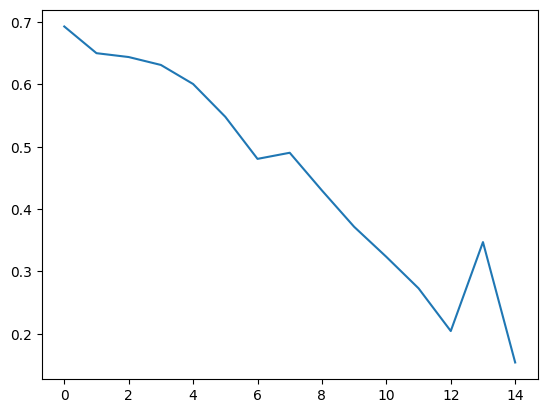

In [77]:
print(n)
plt.plot(costs)

## predict

In [ ]:
def predict(params, X, threshold = 0.5):
    A2, _= forward_propagate(params, X)
    Yp = 1*(A2 >= threshold)
    return Yp

In [ ]:
predict(params, X_train)

## evaluate the performance

In [ ]:
def evaluate_performance(X_train, Y_train, X_test, Y_test, params, print_perf=True):
    Yp_train = predict(params, X_train)
    Yp_test = predict(params, X_test)
    
    acc_train = np.mean(Yp_train == Y_train)
    acc_test = np.mean(Yp_test == Y_test)

    if print_perf:
        print(f'train accuracy: {acc_train:.1%}')
        print(f'test accuracy: {acc_test:.1%}')
        print("")
        
        acc_bs_one = (Y_test == 1).mean()
        acc_bs_zero = (Y_test == 0).mean()
        print('baseline:')
        print(f'test accuracy, model always predicts "1": {acc_bs_one:.1%}')
        print(f'test accuracy, model always predicts "0": {acc_bs_zero:.1%}')
    return acc_train, acc_test

In [ ]:
evaluate_performance(X_train, Y_train, X_test, Y_test, params)

# EXPERIMENTS

In [ ]:
def experiment_with_learning_rate(X_train, Y_train, X_test, Y_test, learning_rates, nb_iterations=2000):
    res_cost = dict()
    res_acc = dict() 

    for lr in learning_rates:
        params, costs = train(X_train, Y_train, nb_iterations, lr)
        acc_train, acc_test = evaluate_performance(X_train, Y_train, X_test, Y_test, params, print_perf=False)

        res_cost[lr] = costs
        res_acc[lr] = (acc_train, acc_test)
        
        plt.plot(res_cost[lr], label= lr)
    
    ## display the evolution of the cost
    plt.xlabel = "iteration ( % 100)"
    plt.ylabel = "cost"
    plt.legend(loc='upper center', shadow=True)
    plt.show()

    ## display the accuracy
    for lr in learning_rates:
        print(f'LR = {lr} / train accuracy = {res_acc[lr][0]:.1%}, test accuracy = {res_acc[lr][1]:.1%}')


In [ ]:
learning_rates = [10**-4, 10**-3, 10**-2, 10**-1]
nb_iterations = 10000
experiment_with_learning_rate(X_train, Y_train, X_test, Y_test, learning_rates, nb_iterations)